In [145]:
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import BubbleKicker, batchbubblekicker
from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [146]:
%matplotlib inline

In [147]:
#!dir

### Pipelines testing¶

#### Canny canonical method

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


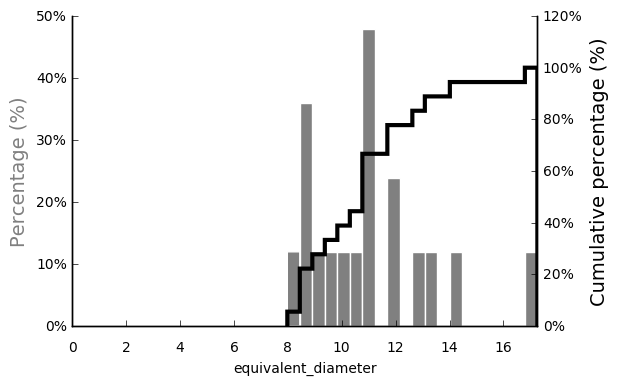

In [148]:
bubbler = CannyPipeline('0325097m_0305.tif', channel='red') #setup the pipeline by loading the file
result = bubbler.run([120, 180], 3, 3, 1, 1)  # executing the pipeline with custom parameters
nbubbles, marker_image, props = bubble_properties_calculate(result)  # extract the properties
filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
fig, axs = bubble_properties_plot(filtered_bubbles, "equivalent_diameter")  # make a plot

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




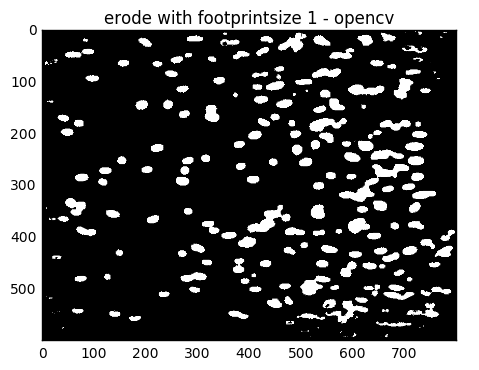

In [151]:
bubbler.plot();
bubbler.what_have_i_done()

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


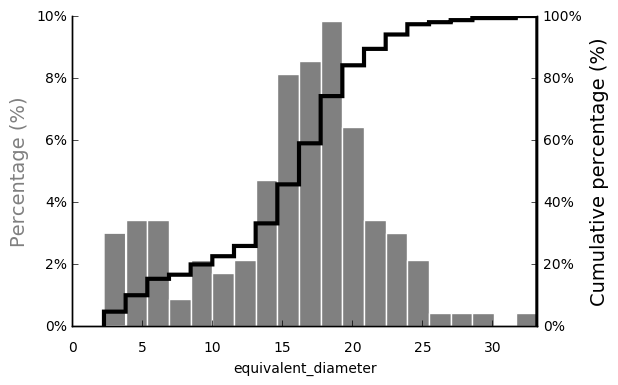

In [149]:
bubbler = AdaptiveThresholdPipeline('0325097m_0305.tif', channel='red') #setup the pipeline by loading the file
result = bubbler.run(91, 18, 3, 1, 1)  # executing the pipeline with custom parameters
nbubbles, marker_image, props = bubble_properties_calculate(result)  # extract the properties
filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
fig, axs = bubble_properties_plot(filtered_bubbles, "equivalent_diameter")  # make a plot

In [150]:
bubbler.what_have_i_done()

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




In [44]:
bubbler = BubbleKicker('0325097m_0305.tif', channel='red')

(<matplotlib.figure.Figure at 0xd38a1b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd609b30>)

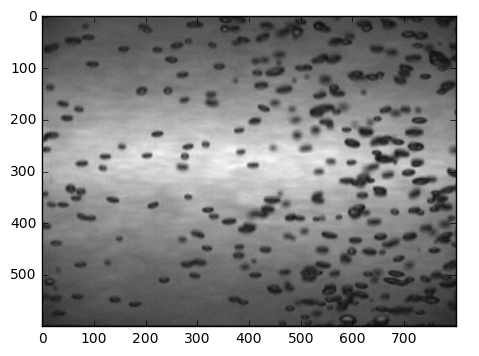

In [45]:
bubbler.plot()

In [46]:
bubbler.edge_detect_canny_opencv([30, 80])

array([[  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       ..., 
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0]], dtype=uint8)

(<matplotlib.figure.Figure at 0xd218310>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9d0dbf0>)

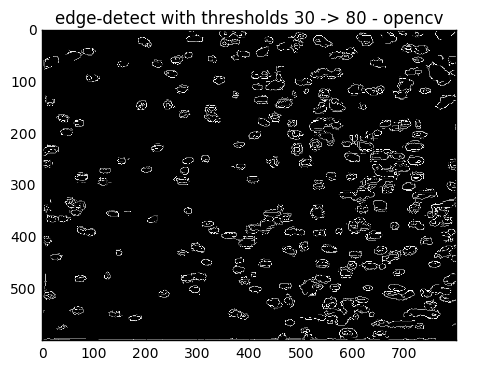

In [47]:
bubbler.plot()

In [48]:
bubbler.dilate_opencv(3)

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ..., 
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

(<matplotlib.figure.Figure at 0x99a2370>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd24e4b0>)

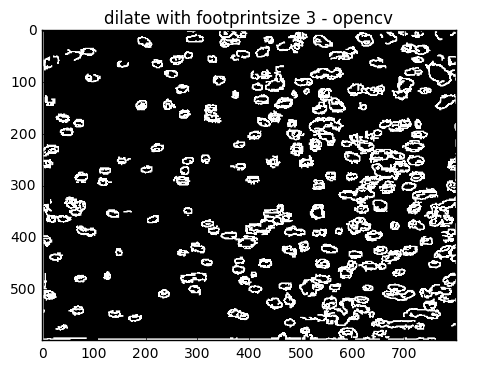

In [49]:
bubbler.plot()

In [50]:
bubbler.what_have_i_done()

Steps undertaken since from raw image:
edge-detect with thresholds 30 -> 80 - opencv
dilate with footprintsize 3 - opencv




(<matplotlib.figure.Figure at 0x1125da90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f22910>)

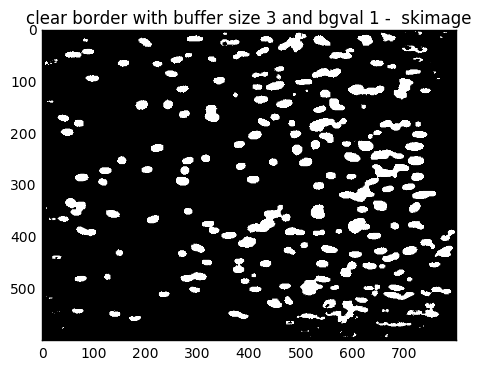

In [64]:
bubbler.reset_to_raw()
bubbler.adaptive_threshold_opencv()
bubbler.clear_border_skimage()
bubbler.plot()

In [71]:
custom_filter = {'circularity_reciprocal': {'min': 0.2, 'max': 1.6},
                 'convexity': {'min': 1.92}}
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
id_image, props = bubble_properties_calculate(result, rules=custom_filter)
print(props)

plt.show()

TypeError: bubble_properties_calculate() got an unexpected keyword argument 'rules'